In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./space/pulsar_stars.csv")

In [4]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [5]:
df["target_class"].value_counts()

0    16259
1     1639
Name: target_class, dtype: int64

In [6]:
X = df.drop(["target_class"], axis=1).values
X.shape

(17898, 8)

In [7]:
y = df["target_class"]
y.shape

(17898,)

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)
X_train_std.shape, X_test_std.shape

((12528, 8), (5370, 8))

LogisticRegression
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4878
           1       0.94      0.82      0.87       492

    accuracy                           0.98      5370
   macro avg       0.96      0.91      0.93      5370
weighted avg       0.98      0.98      0.98      5370



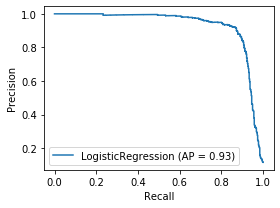

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, balanced_accuracy_score, plot_precision_recall_curve

from util import plot_lr_class

log = LogisticRegression().fit(X_train_std, y_train)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 3))
plot_lr_class(log, X_test_std, y_test, ax)
fig.tight_layout()
fig.savefig("images/Pulsar-LogisticRegression-PRCurve.png")

In [10]:
from algorithms import SimpleESClassifier
from objectives import CrossEntropyObjective

ses = SimpleESClassifier(objective=CrossEntropyObjective(), n_iter=50, random_state=0)
ses.fit(X_train_std, y_train);

100%|██████████| 50/50 [00:05<00:00,  8.80it/s]


SimpleESClassifier
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4878
           1       0.93      0.83      0.88       492

    accuracy                           0.98      5370
   macro avg       0.96      0.91      0.93      5370
weighted avg       0.98      0.98      0.98      5370



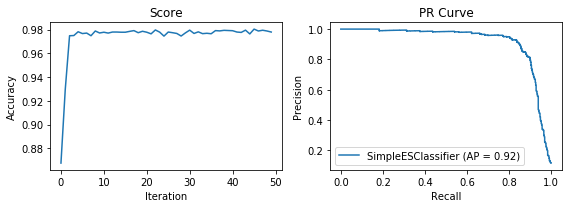

In [11]:
from util import plot_class

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
plot_class(ses, X_test_std, y_test, axes)
fig.tight_layout()
fig.savefig("images/Pulsar-SimpleESClassifier-PRCurve.png")

In [25]:
from algorithms import GeneticESClassifier

ges = GeneticESClassifier(objective=CrossEntropyObjective(), n_iter=50, random_state=0, sigma=0.1)
ges.fit(X_train_std, y_train);

100%|██████████| 50/50 [00:04<00:00, 10.69it/s]


GeneticESClassifier
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4878
           1       0.94      0.80      0.86       492

    accuracy                           0.98      5370
   macro avg       0.96      0.90      0.93      5370
weighted avg       0.98      0.98      0.98      5370



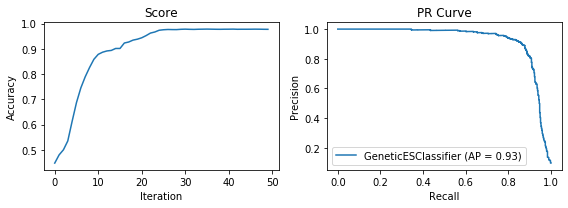

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
plot_class(ges, X_test_std, y_test, axes)
fig.tight_layout()
fig.savefig("images/Pulsar-GeneticESClassifier-PRCurve.png")

In [34]:
from algorithms import NaturalESClassifier

nes = NaturalESClassifier(objective=CrossEntropyObjective(), n_iter=50, random_state=0, sigma=0.2, alpha=0.06)
nes.fit(X_train_std, y_train);

100%|██████████| 50/50 [00:04<00:00, 11.53it/s]


NaturalESClassifier
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4878
           1       0.94      0.81      0.87       492

    accuracy                           0.98      5370
   macro avg       0.96      0.90      0.93      5370
weighted avg       0.98      0.98      0.98      5370



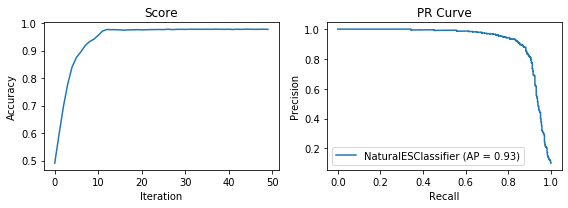

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
plot_class(nes, X_test_std, y_test, axes)
fig.tight_layout()
fig.savefig("images/Pulsar-NaturalESClassifier-PRCurve.png")

In [49]:
from algorithms import DifferentialEvolutionClassifier

dev = DifferentialEvolutionClassifier(objective=CrossEntropyObjective(), n_iter=250, random_state=0, bounds=(-10, 10), lmbda=1.4)
dev.fit(X_train_std, y_train);

100%|██████████| 250/250 [00:03<00:00, 71.41it/s]


DifferentialEvolutionClassifier
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4878
           1       0.88      0.86      0.87       492

    accuracy                           0.98      5370
   macro avg       0.93      0.92      0.93      5370
weighted avg       0.98      0.98      0.98      5370



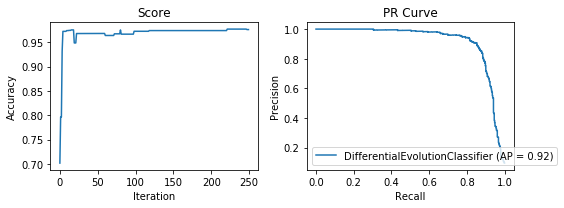

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
plot_class(dev, X_test_std, y_test, axes)
fig.tight_layout()
fig.savefig("images/Pulsar-DifferentialEvolutionClassifier-PRCurve.png")

In [51]:
from util import cross_val

ses_score = cross_val(ses, X, y)

100%|██████████| 50/50 [00:06<00:00,  7.85it/s]


In [52]:
ges_score = cross_val(ges, X, y)

100%|██████████| 50/50 [00:05<00:00,  9.74it/s]


In [53]:
nes_score = cross_val(nes, X, y)

100%|██████████| 50/50 [00:08<00:00,  5.56it/s]


In [54]:
dev_score = cross_val(dev, X, y)

100%|██████████| 250/250 [00:03<00:00, 64.07it/s]


In [55]:
log_score = cross_val(log, X, y)

In [56]:
print("SimpleESClassifier Accuracy:               %0.5f (+/- %0.5f)" % (ses_score.mean(), ses_score.std() * 2))
print("GeneticESClassifier Accuracy:              %0.5f (+/- %0.5f)" % (ges_score.mean(), ges_score.std() * 2))
print("NaturalESClassifier Accuracy:              %0.5f (+/- %0.5f)" % (nes_score.mean(), nes_score.std() * 2))
print("DifferentialEvolutionClassifier Accuracy:  %0.5f (+/- %0.5f)" % (dev_score.mean(), dev_score.std() * 2))
print("LogisticRegression Accuracy:               %0.5f (+/- %0.5f)" % (log_score.mean(), log_score.std() * 2))

SimpleESClassifier Accuracy:               0.97815 (+/- 0.00839)
GeneticESClassifier Accuracy:              0.97709 (+/- 0.00469)
NaturalESClassifier Accuracy:              0.97620 (+/- 0.00546)
DifferentialEvolutionClassifier Accuracy:  0.97653 (+/- 0.00517)
LogisticRegression Accuracy:               0.97810 (+/- 0.00488)


That went pretty well, so we'll look at another classification dataset.

In [57]:
df = pd.read_csv("./space/nasa.csv")

In [58]:
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [59]:
df["Hazardous"].value_counts()

False    3932
True      755
Name: Hazardous, dtype: int64

In [60]:
X = df[["Absolute Magnitude",
"Est Dia in Feet(min)",
"Est Dia in Feet(max)",
"Epoch Date Close Approach",
"Relative Velocity km per hr",
"Miles per hour",
"Miss Dist.(miles)",
"Orbit Uncertainity",
"Minimum Orbit Intersection",
"Jupiter Tisserand Invariant",
"Epoch Osculation",
"Eccentricity",
"Semi Major Axis",
"Inclination",
"Asc Node Longitude",
"Orbital Period",
"Perihelion Distance",
"Perihelion Arg",
"Aphelion Dist",
"Perihelion Time",
"Mean Anomaly",
"Mean Motion"]].values
X.shape

(4687, 22)

In [61]:
y = df["Hazardous"]
y.shape

(4687,)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)
X_train_std.shape, X_test_std.shape

((3280, 22), (1407, 22))

LogisticRegression
              precision    recall  f1-score   support

       False       0.97      0.98      0.98      1180
        True       0.89      0.85      0.87       227

    accuracy                           0.96      1407
   macro avg       0.93      0.91      0.92      1407
weighted avg       0.96      0.96      0.96      1407



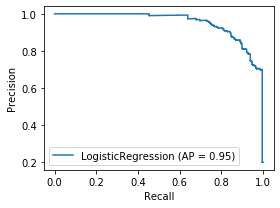

In [63]:
log = LogisticRegression().fit(X_train_std, y_train)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 3))
plot_lr_class(log, X_test_std, y_test, ax)
fig.tight_layout()
fig.savefig("images/Nasa-LogisticRegression-PRCurve.png")

In [84]:
ses = SimpleESClassifier(objective=CrossEntropyObjective(), n_iter=100, random_state=0)
ses.fit(X_train_std, y_train);

100%|██████████| 100/100 [00:03<00:00, 26.00it/s]


SimpleESClassifier
              precision    recall  f1-score   support

       False       0.97      0.96      0.96      1180
        True       0.79      0.87      0.83       227

    accuracy                           0.94      1407
   macro avg       0.88      0.91      0.90      1407
weighted avg       0.94      0.94      0.94      1407



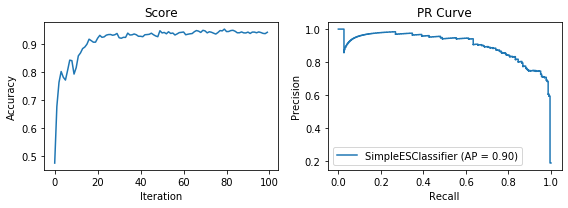

In [85]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
plot_class(ses, X_test_std, y_test, axes)
fig.tight_layout()
fig.savefig("images/Nasa-SimpleESClassifier-PRCurve.png")

In [96]:
ges = GeneticESClassifier(objective=CrossEntropyObjective(), n_iter=100, random_state=0)
ges.fit(X_train_std, y_train);

100%|██████████| 100/100 [00:04<00:00, 22.14it/s]


GeneticESClassifier
              precision    recall  f1-score   support

       False       0.94      0.97      0.96      1180
        True       0.84      0.70      0.76       227

    accuracy                           0.93      1407
   macro avg       0.89      0.83      0.86      1407
weighted avg       0.93      0.93      0.93      1407



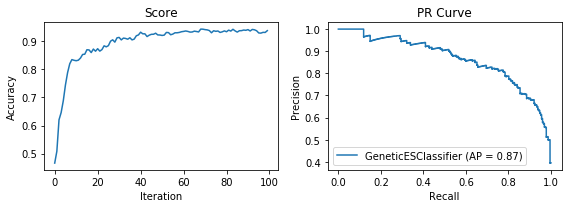

In [97]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
plot_class(ges, X_test_std, y_test, axes)
fig.tight_layout()
fig.savefig("images/Nasa-GeneticESClassifier-PRCurve.png")

In [108]:
nes = NaturalESClassifier(objective=CrossEntropyObjective(), n_iter=100, random_state=0, sigma=0.2)
nes.fit(X_train_std, y_train);

100%|██████████| 100/100 [00:03<00:00, 26.17it/s]


NaturalESClassifier
              precision    recall  f1-score   support

       False       0.97      0.97      0.97      1180
        True       0.85      0.87      0.86       227

    accuracy                           0.95      1407
   macro avg       0.91      0.92      0.92      1407
weighted avg       0.95      0.95      0.95      1407



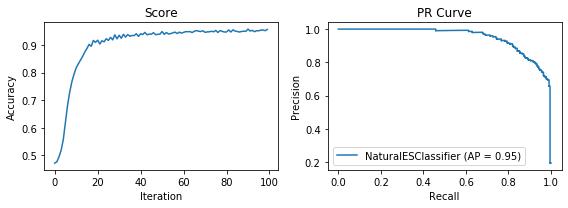

In [109]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
plot_class(nes, X_test_std, y_test, axes)
fig.tight_layout()
fig.savefig("images/Nasa-NaturalESClassifier-PRCurve.png")

In [125]:
dev = DifferentialEvolutionClassifier(objective=CrossEntropyObjective(), n_iter=250, random_state=0, bounds=(-10, 10), lmbda=1.5)
dev.fit(X_train_std, y_train);

100%|██████████| 250/250 [00:02<00:00, 117.57it/s]


NaturalESClassifier
              precision    recall  f1-score   support

       False       0.97      0.97      0.97      1180
        True       0.85      0.87      0.86       227

    accuracy                           0.95      1407
   macro avg       0.91      0.92      0.92      1407
weighted avg       0.95      0.95      0.95      1407



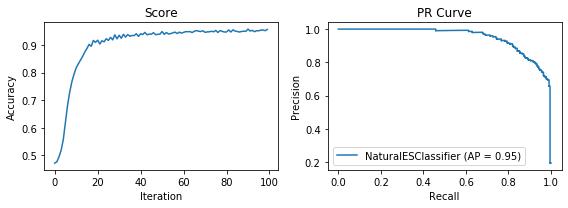

In [126]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
plot_class(nes, X_test_std, y_test, axes)
fig.tight_layout()
fig.savefig("images/Nasa-DifferentialEvolutionClassifier-PRCurve.png")

In [110]:
ses_score = cross_val(ses, X, y)

100%|██████████| 100/100 [00:07<00:00, 14.19it/s]


In [111]:
ges_score = cross_val(ges, X, y)

100%|██████████| 100/100 [00:06<00:00, 14.55it/s]


In [112]:
nes_score = cross_val(nes, X, y)

100%|██████████| 100/100 [00:09<00:00, 11.10it/s]


In [127]:
dev_score = cross_val(dev, X, y)

100%|██████████| 250/250 [00:02<00:00, 96.52it/s]


In [119]:
log_score = cross_val(log, X, y)

In [128]:
print("SimpleESClassifier Accuracy:               %0.5f (+/- %0.5f)" % (ses_score.mean(), ses_score.std() * 2))
print("GeneticESClassifier Accuracy:              %0.5f (+/- %0.5f)" % (ges_score.mean(), ges_score.std() * 2))
print("NaturalESClassifier Accuracy:              %0.5f (+/- %0.5f)" % (nes_score.mean(), nes_score.std() * 2))
print("DifferentialEvolutionClassifier Accuracy:  %0.5f (+/- %0.5f)" % (dev_score.mean(), dev_score.std() * 2))
print("LogisticRegression Accuracy:               %0.5f (+/- %0.5f)" % (log_score.mean(), log_score.std() * 2))

SimpleESClassifier Accuracy:               0.93344 (+/- 0.02659)
GeneticESClassifier Accuracy:              0.92682 (+/- 0.02776)
NaturalESClassifier Accuracy:              0.94773 (+/- 0.01631)
DifferentialEvolutionClassifier Accuracy:  0.91551 (+/- 0.04498)
LogisticRegression Accuracy:               0.95349 (+/- 0.01161)
